In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [3]:
from datetime import datetime, timedelta
from pandas import DataFrame

## 1. Carga del dataset

Url origen datos: https://www.kaggle.com/datasets/pavan9065/predicting-employee-attrition

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Cargar el dataset
d=pd.read_csv('/content/drive/MyDrive/ESPECIALIZACION/I SEMESTRE/0. Monografía/datos monografia/train_data.csv')

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [8]:
d.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [9]:
d['Joining Designation'].value_counts()

1    9831
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64

## Variable de salida

In [10]:
d['attrition'] = np.where(d['LastWorkingDate'].str.contains('NaN', case=False), 0, 1)
d['attrition']

0        0
1        0
2        1
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: attrition, Length: 19104, dtype: int64

In [11]:
d['attrition'].value_counts()

0    17488
1     1616
Name: attrition, dtype: int64

## conversión de variables fechas a datetime

In [12]:
d['MMM-YY'] = pd.to_datetime(d['MMM-YY'])

In [13]:
d['LastWorkingDate'] = pd.to_datetime(d['LastWorkingDate'])

In [14]:
d['Dateofjoining'] = pd.to_datetime(d['Dateofjoining'])
d

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,740280,3,0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,448370,3,0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,0,2,0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,200420,2,0


## Se obtiene variable retención days

In [15]:
for i in d["attrition"]:
   if i==0:
    d['retention_days']= (d['MMM-YY'] - d['Dateofjoining']) / np.timedelta64(1, 'D')
   else:
    d['retention_days']=(d['LastWorkingDate'] - d['Dateofjoining']) / np.timedelta64(1, 'D')


In [16]:
d.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0,8.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0,39.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,68.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,-5.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,25.0


## Limpieza datos nulos

In [17]:
d[d['retention_days']<0]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,-5.0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0,-6.0
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,NaT,1,1,0,1,0,-8.0
18,2017-09-01,8,34,Male,C2,College,70656,2017-09-19,NaT,3,3,0,1,0,-18.0
21,2017-12-01,11,28,Female,C19,Master,42172,2017-12-07,NaT,1,1,0,1,0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19038,2017-01-01,2779,28,Male,C26,College,95133,2017-01-26,NaT,3,3,0,1,0,-25.0
19040,2017-02-01,2781,25,Male,C23,Master,46952,2017-02-17,NaT,2,2,0,1,0,-16.0
19051,2016-05-01,2782,26,Male,C19,Bachelor,29582,2016-05-16,NaT,1,1,0,1,0,-15.0
19079,2017-08-01,2785,34,Female,C9,College,12105,2017-08-28,NaT,1,1,0,1,0,-27.0


In [18]:
# Se eliminan los valores con retención negativa
d = d.drop(d[d['retention_days']<0].index)

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

In [19]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                18064 non-null  datetime64[ns]
 1   Emp_ID                18064 non-null  int64         
 2   Age                   18064 non-null  int64         
 3   Gender                18064 non-null  object        
 4   City                  18064 non-null  object        
 5   Education_Level       18064 non-null  object        
 6   Salary                18064 non-null  int64         
 7   Dateofjoining         18064 non-null  datetime64[ns]
 8   LastWorkingDate       1604 non-null   datetime64[ns]
 9   Joining Designation   18064 non-null  int64         
 10  Designation           18064 non-null  int64         
 11  Total Business Value  18064 non-null  int64         
 12  Quarterly Rating      18064 non-null  int64         
 13  attrition       

## Borrado columnas no necesarias

In [20]:
d.drop([ 'MMM-YY','Emp_ID','City','Dateofjoining','LastWorkingDate'], axis='columns', inplace=True)

In [21]:
columnas_final=d.columns.values

In [22]:
columnas_final

array(['Age', 'Gender', 'Education_Level', 'Salary',
       'Joining Designation', 'Designation', 'Total Business Value',
       'Quarterly Rating', 'attrition', 'retention_days'], dtype=object)

## Gráficos de frecuencia

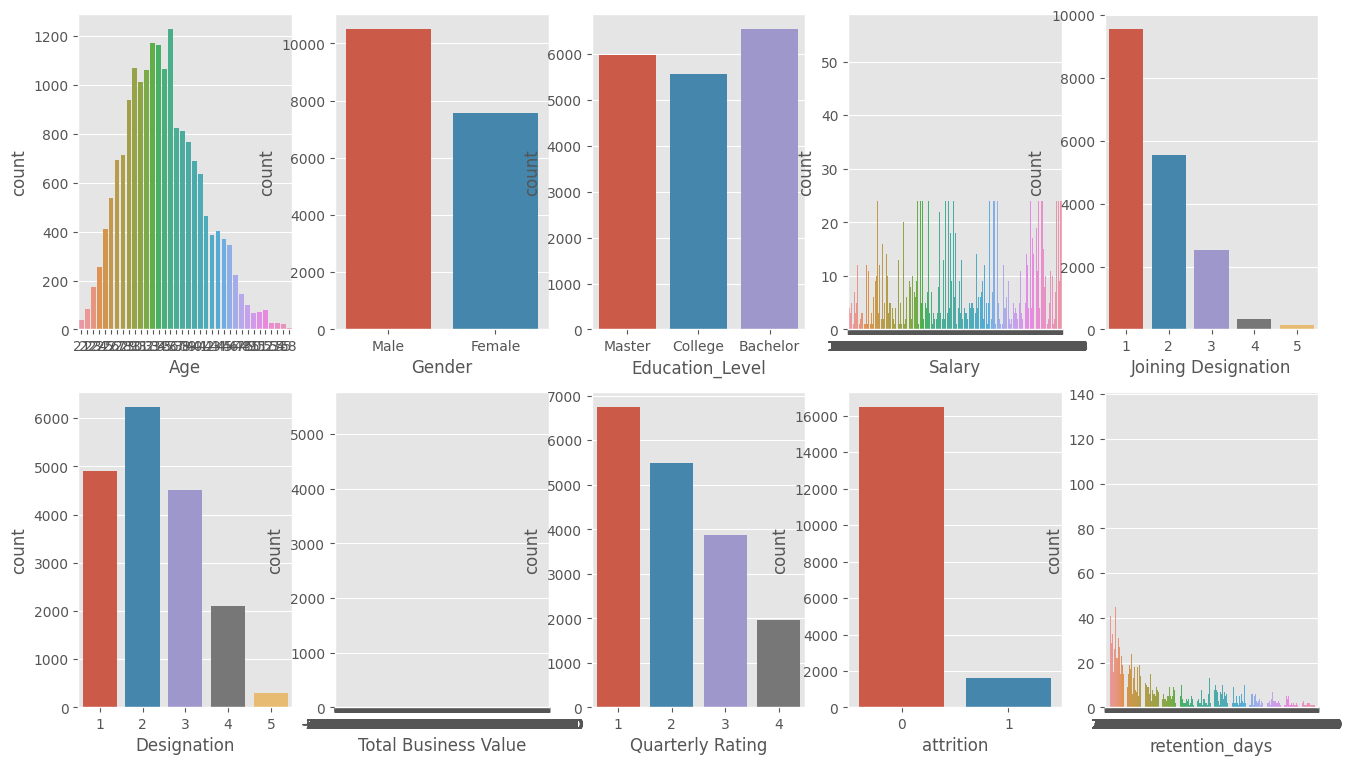

In [23]:
plot_multiples_graficas(d,columnas_final, 5, 2, 'c', None, (16,9))

In [24]:
d['promoted'] = (d['Joining Designation'] != d['Designation']).astype(int)
d

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days,promoted
0,28,Male,Master,57387,1,1,2381060,2,0,8.0,0
1,28,Male,Master,57387,1,1,-665480,2,0,39.0,0
2,28,Male,Master,57387,1,1,0,2,1,68.0,0
3,31,Male,Master,67016,2,2,0,1,0,25.0,0
4,43,Male,Master,65603,2,2,0,1,0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...
18059,30,Male,Master,70254,2,2,740280,3,0,54.0,0
18060,30,Male,Master,70254,2,2,448370,3,0,85.0,0
18061,30,Male,Master,70254,2,2,0,2,0,115.0,0
18062,30,Male,Master,70254,2,2,200420,2,0,146.0,0


In [25]:
d['Gender'].value_counts()

Male      10485
Female     7579
Name: Gender, dtype: int64

In [26]:
d['GenderBin'] = d['Gender'].map({'Male': 0, 'Female': 1})

In [27]:
d['GenderBin'].value_counts()

0    10485
1     7579
Name: GenderBin, dtype: int64

## **Obtener** dummies

In [28]:
d_cat =pd.get_dummies(d, drop_first=0)

In [29]:
d.head()

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days,promoted,GenderBin
0,28,Male,Master,57387,1,1,2381060,2,0,8.0,0,0
1,28,Male,Master,57387,1,1,-665480,2,0,39.0,0,0
2,28,Male,Master,57387,1,1,0,2,1,68.0,0,0
3,31,Male,Master,67016,2,2,0,1,0,25.0,0,0
4,43,Male,Master,65603,2,2,0,1,0,25.0,0,0


In [30]:
d_cat

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days,promoted,GenderBin,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,28,57387,1,1,2381060,2,0,8.0,0,0,0,1,0,0,1
1,28,57387,1,1,-665480,2,0,39.0,0,0,0,1,0,0,1
2,28,57387,1,1,0,2,1,68.0,0,0,0,1,0,0,1
3,31,67016,2,2,0,1,0,25.0,0,0,0,1,0,0,1
4,43,65603,2,2,0,1,0,25.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,30,70254,2,2,740280,3,0,54.0,0,0,0,1,0,0,1
18060,30,70254,2,2,448370,3,0,85.0,0,0,0,1,0,0,1
18061,30,70254,2,2,0,2,0,115.0,0,0,0,1,0,0,1
18062,30,70254,2,2,200420,2,0,146.0,0,0,0,1,0,0,1


In [31]:

d_cat.drop([ 'Gender_Female', 'Gender_Male'], axis='columns', inplace=True)

In [32]:
d_cat

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,28,57387,1,1,2381060,2,0,8.0,0,0,0,0,1
1,28,57387,1,1,-665480,2,0,39.0,0,0,0,0,1
2,28,57387,1,1,0,2,1,68.0,0,0,0,0,1
3,31,67016,2,2,0,1,0,25.0,0,0,0,0,1
4,43,65603,2,2,0,1,0,25.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,30,70254,2,2,740280,3,0,54.0,0,0,0,0,1
18060,30,70254,2,2,448370,3,0,85.0,0,0,0,0,1
18061,30,70254,2,2,0,2,0,115.0,0,0,0,0,1
18062,30,70254,2,2,200420,2,0,146.0,0,0,0,0,1


In [33]:
d_cat['Designation'].value_counts()

2    6222
1    4910
3    4516
4    2112
5     304
Name: Designation, dtype: int64

## Balanceo de variable de salida

In [34]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(d_cat.drop('attrition', axis=1), d_cat['attrition'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=d_cat.columns.drop('attrition'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

In [35]:
# Dataset balanceado
df_balanced.head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,attrition
0,28,57387,1,1,2381060,2,8.0,0,0,0,0,1,0
1,28,57387,1,1,-665480,2,39.0,0,0,0,0,1,0
2,28,57387,1,1,0,2,68.0,0,0,0,0,1,1
3,31,67016,2,2,0,1,25.0,0,0,0,0,1,0
4,43,65603,2,2,0,1,25.0,0,0,0,0,1,0


In [36]:
df_balanced['attrition'].value_counts()

0    16460
1    16460
Name: attrition, dtype: int64

## Exportar base de datos

In [37]:
# Exportamos el dataframe a un archivo CSV
df_balanced.to_csv('/content/drive/MyDrive/083 de 2021 C - Fondo de estabilización panela/train_data_PREPARADO.csv', index=False)

OSError: ignored